<font size='5'> <center> <u>**Playing Gomoku with RL Agents**</u></center></font>

This notebook demonstrate how to develop a reinforcement learning agent that can play gomoku.

First of all, lets create some basic function and classes for gaming 😊. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
from abc import abstractmethod
from typing import Optional


def draw(chessboard: np.ndarray):
    """
    Draws a GoMoku board with black stones for player 1 and white stones for player 2 
    based on a given numpy matrix.

    NB: The author is lazy LOL.
    So you actually cannot place stone on the border of the board.
    As a result, technically the board is 17x17.
    
    Parameters:
    chessboard (np.ndarray): A 2D numpy array where 0 denotes player 1 and 1 denotes player 2.
    """
    size = chessboard.shape[0]

    fig, ax = plt.subplots()

    # Draw thin grid lines
    for x in range(size):
        ax.axhline(x + 0.5, lw=1, color='black', zorder=0)
        ax.axvline(x + 0.5, lw=1, color='black', zorder=0)
    
    # Draw border lines
    ax.axhline(-0.5, lw=2, color='black', zorder=0)
    ax.axhline(size + 1 - 0.5, lw=2, color='black', zorder=0)
    ax.axvline(-0.5, lw=2, color='black', zorder=0)
    ax.axvline(size + 1 - 0.5, lw=2, color='black', zorder=0)

    # Draw stones on the intersections with smaller size
    stone_radius = 0.3  # Reduced radius for visual appeal
    for i in range(size):
        for j in range(size):
            if chessboard[i, j] == 1:
                circle = plt.Circle((j + 0.5, i + 0.5), stone_radius, color='black', zorder=10)
                ax.add_artist(circle)
            elif chessboard[i, j] == 2:
                circle = plt.Circle((j + 0.5, i + 0.5), stone_radius, edgecolor='black', facecolor='white', linewidth=2, zorder=10)
                ax.add_artist(circle)

    # Set the limits to match the board and remove gaps
    ax.set_xlim(-0.5, size + 1 - 0.5)
    ax.set_ylim(-0.5, size + 1 - 0.5)
    ax.set_xticks(np.arange(0, size + 1, 1))
    ax.set_yticks(np.arange(0, size + 1, 1))

    # Ensure the aspect ratio is equal
    ax.set_aspect('equal')

    plt.gca().invert_yaxis()
    plt.show()


class GameResult(Enum):
    WIN = 1
    LOSE = 2
    DRAW = 3


class Game:
    def __init__(self, player1: "Player", player2: "Player", size=10):
        """
        我有密集恐惧症😆
        """
        self.size = size
        self.player1 = player1
        self.player2 = player2
        self.reset()

    def reset(self):
        self.starts_player1 = True
        self.board = np.zeros((self.size, self.size), dtype=int)

    def simulate_moves(self):
        game_result = None
        self.render_board()

        while np.any(self.board == 0) and (game_result := self.check_game_result()) is None:
            player = self.player1 if self.starts_player1 else self.player2
            move = player.place_stone(self.board)
            self.board[move[0], move[1]] = 1 if self.starts_player1 else 2
            self.starts_player1 = not self.starts_player1
            self.render_board()
            yield
        
        if game_result is None:
            self.player1.on_game_end(GameResult.DRAW)
            self.player2.on_game_end(GameResult.DRAW)
        elif game_result == 1:
            self.player1.on_game_end(GameResult.WIN)
            self.player2.on_game_end(GameResult.LOSE)
        else:
            self.player1.on_game_end(GameResult.LOSE)
            self.player2.on_game_end(GameResult.WIN)

        self.render_board()
        yield

    def simulate(self):
        gen = self.simulate_moves()
        try:
            while True:
                next(gen)
        except StopIteration:
            print("Game finished.")

    def check_game_result(self) -> Optional[int]:
        # Check rows
        for i in range(self.size):
            for j in range(self.size - 4):
                if self.board[i, j] == self.board[i, j + 1] == self.board[i, j + 2] == self.board[i, j + 3] == self.board[i, j + 4]:
                    if self.board[i, j] != 0:
                        return self.board[i, j]

        # Check columns
        for i in range(self.size - 4):
            for j in range(self.size):
                if self.board[i, j] == self.board[i + 1, j] == self.board[i + 2, j] == self.board[i + 3, j] == self.board[i + 4, j]:
                    if self.board[i, j] != 0:
                        return self.board[i, j]

        # Check diagonals
        for i in range(self.size - 4):
            for j in range(self.size - 4):
                if self.board[i, j] == self.board[i + 1, j + 1] == self.board[i + 2, j + 2] == self.board[i + 3, j + 3] == self.board[i + 4, j + 4]:
                    if self.board[i, j] != 0:
                        return self.board[i, j]
                if self.board[i, j + 4] == self.board[i + 1, j + 3] == self.board[i + 2, j + 2] == self.board[i + 3, j + 1] == self.board[i + 4, j]:
                    if self.board[i, j + 4] != 0:
                        return self.board[i, j + 4]

        return None

    def render_board(self):
        draw(self.board)


class Player:
    def __init__(self):
        self.history = []

    @abstractmethod
    def place_stone(self, board: np.ndarray) -> np.ndarray:
        pass

    @abstractmethod
    def on_game_end(self, result: GameResult):
        pass

    
class HumanPlayer(Player):
    def place_stone(self, board: np.ndarray) -> np.ndarray:
        move = input("Enter your move (row, col): ").split(',')
        return np.array([int(move[0]), int(move[1])])
    
    def on_game_end(self, result: GameResult):
        self.history.append(result.value)


# game = Game()
# game.player1 = HumanPlayer()
# game.player2 = HumanPlayer()
# game.simulate()

Now, let's create a bot that play gomoku with heuristics

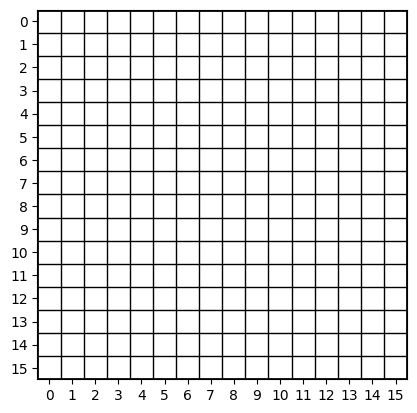

Player1: Making a move...
Analyzing opponent's move...
Analyzing our move...


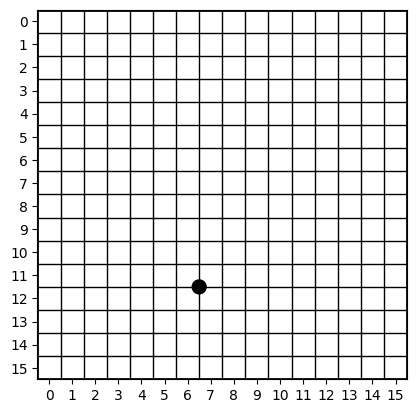

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live2, move: (((11, 6),), (11, 7)), strength: 2
Analyzing our move...


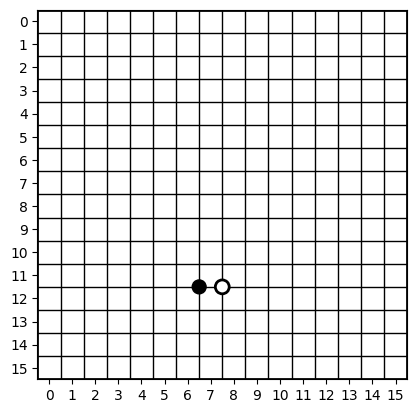

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live2, move: (((11, 7),), (10, 8)), strength: 2
Analyzing our move...
Using strategy: live2, move: (((11, 6),), (12, 5)), strength: 2


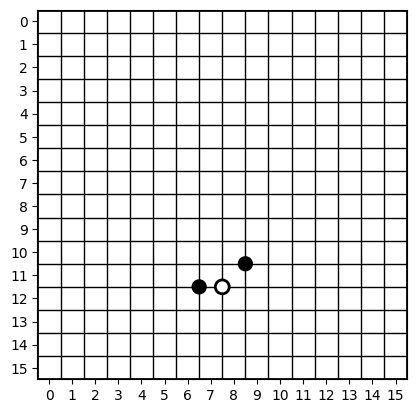

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live2_live2, move: (((10, 8), (11, 6)), (10, 7)), strength: 4
Analyzing our move...
Using strategy: live2, move: (((11, 7),), (10, 7)), strength: 2


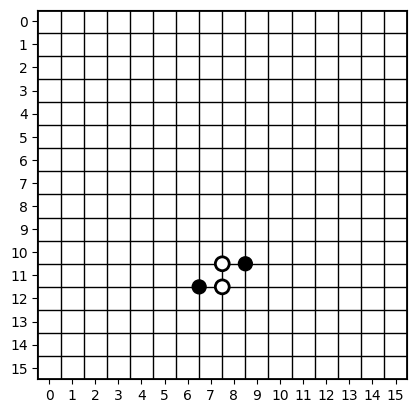

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((10, 7), (11, 7)), (12, 7)), strength: 4
Analyzing our move...
Using strategy: live2, move: (((11, 6),), (10, 5)), strength: 2


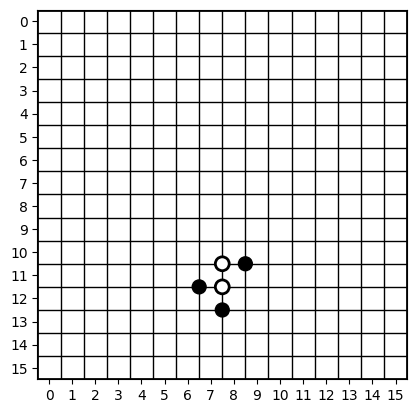

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((11, 6), (12, 7)), (10, 5)), strength: 4
Analyzing our move...
Using strategy: live2, move: (((11, 7),), (12, 8)), strength: 2


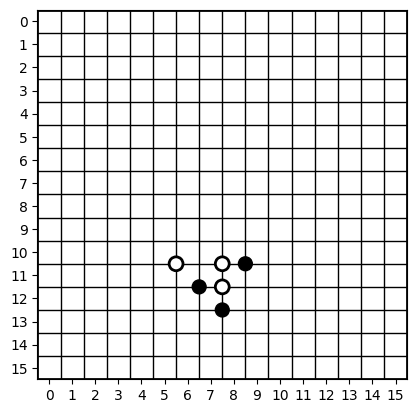

Player1: Making a move...
Analyzing opponent's move...
Using strategy: combo_live2_live2, move: (((10, 5), (10, 7)), (9, 6)), strength: 4
Analyzing our move...
Using strategy: combo_live2_live2, move: (((12, 7), (10, 8)), (11, 8)), strength: 4


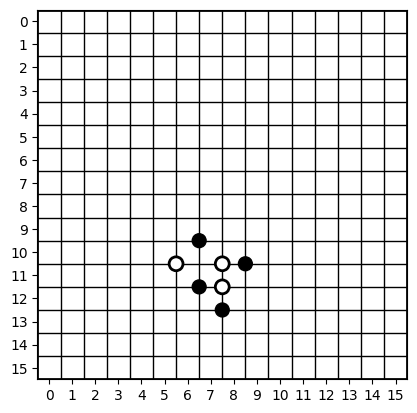

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((9, 6), (11, 6)), (10, 6)), strength: 4
Analyzing our move...
Using strategy: combo_dead3_live2, move: (((11, 7), (10, 5), (10, 7)), (10, 6)), strength: 4


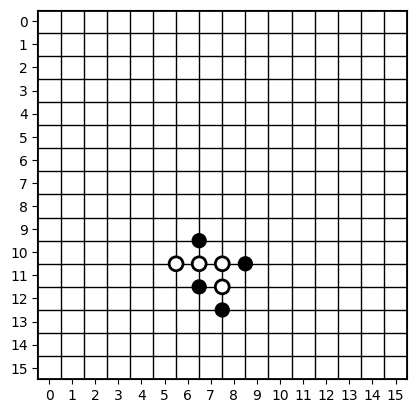

Player1: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_live2, move: (((11, 7), (10, 5), (10, 6)), (9, 5)), strength: 6
Analyzing our move...
Using strategy: combo_live2_live2, move: (((12, 7), (10, 8)), (11, 8)), strength: 4


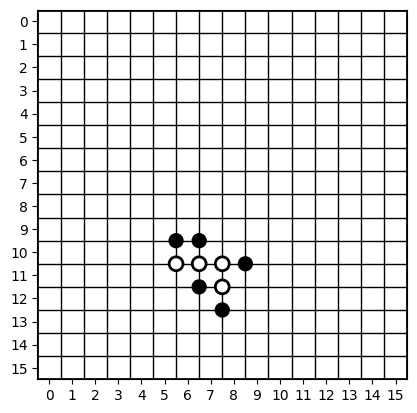

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_live2, move: (((9, 5), (9, 6), (10, 8)), (9, 7)), strength: 6
Analyzing our move...
Using strategy: dead4, move: (((10, 5), (10, 6), (10, 7)), (10, 4)), strength: 4


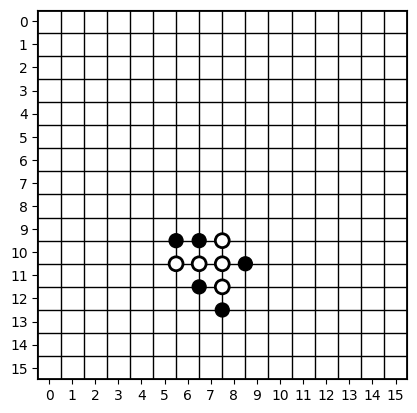

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((9, 7), (10, 6)), (8, 8)), strength: 4
Analyzing our move...
Using strategy: combo_live2_live2, move: (((12, 7), (10, 8)), (11, 8)), strength: 4


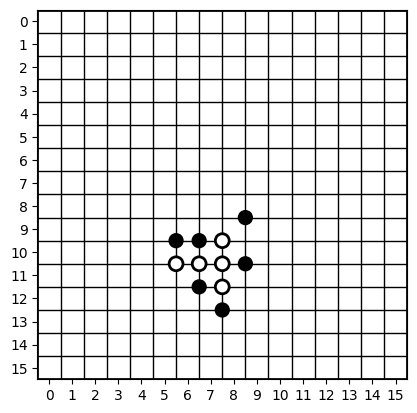

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((8, 8), (10, 8)), (9, 8)), strength: 4
Analyzing our move...
Using strategy: dead4, move: (((10, 5), (10, 6), (10, 7)), (10, 4)), strength: 4


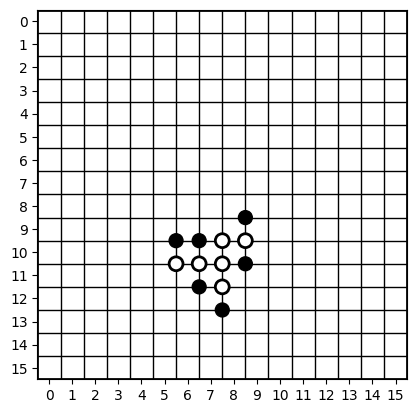

Player1: Making a move...
Analyzing opponent's move...
Using strategy: combo_dead4_live2_dead3, move: (((11, 7), (9, 8), (9, 7), (10, 7)), (8, 7)), strength: 8
Analyzing our move...
Using strategy: dead3, move: (((11, 6), (12, 7)), (13, 8)), strength: 2


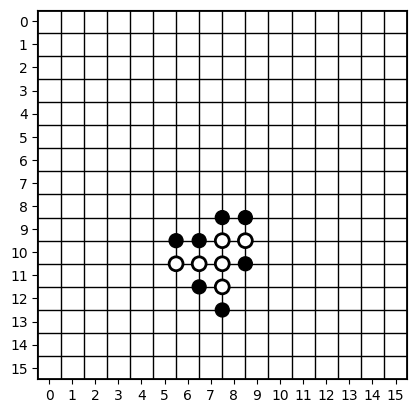

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_live2, move: (((8, 7), (8, 8), (9, 5)), (8, 6)), strength: 6
Analyzing our move...
Using strategy: dead4, move: (((10, 5), (10, 6), (10, 7)), (10, 4)), strength: 4


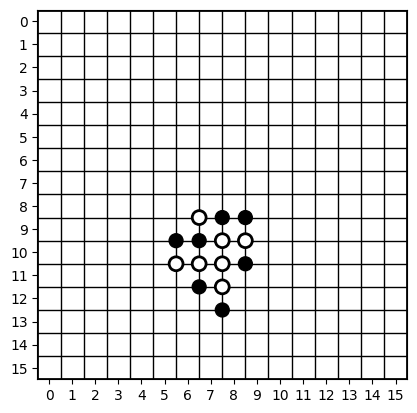

Player1: Making a move...
Analyzing opponent's move...
Using strategy: dead4, move: (((10, 5), (10, 6), (10, 7)), (10, 4)), strength: 4
Analyzing our move...
Using strategy: live2, move: (((12, 7),), (12, 8)), strength: 2


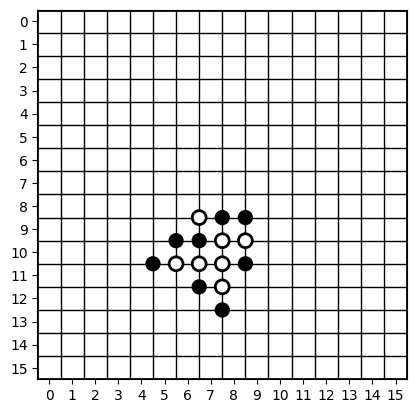

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live2_dead3, move: (((10, 4), (9, 5), (9, 6)), (9, 4)), strength: 4
Analyzing our move...
Using strategy: dead3, move: (((9, 7), (9, 8)), (9, 9)), strength: 2


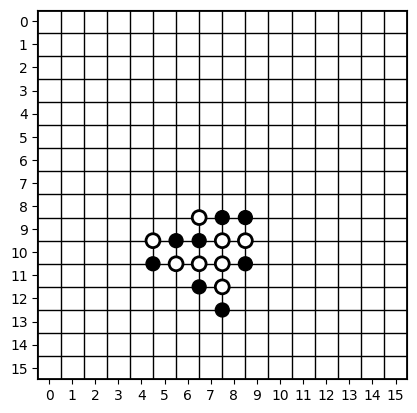

Player1: Making a move...
Analyzing opponent's move...
Using strategy: dead3, move: (((10, 6), (11, 7)), (12, 8)), strength: 2
Analyzing our move...
Using strategy: live2, move: (((12, 7),), (13, 6)), strength: 2


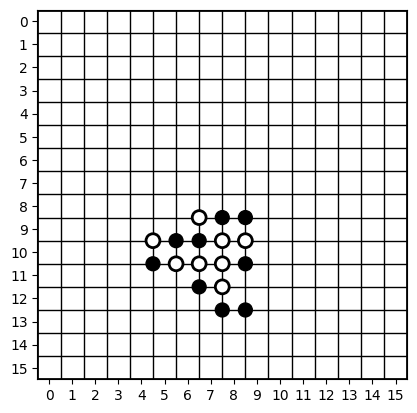

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((12, 7), (12, 8)), (12, 9)), strength: 4
Analyzing our move...
Using strategy: dead3, move: (((9, 8), (10, 7)), (8, 9)), strength: 2


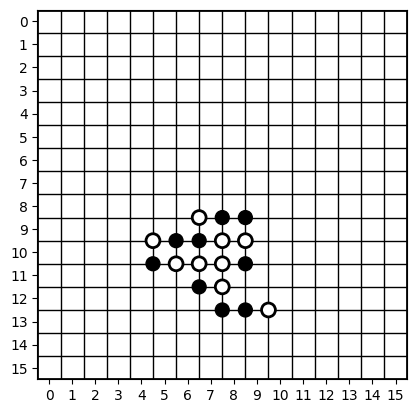

Player1: Making a move...
Analyzing opponent's move...
Using strategy: dead3, move: (((9, 4), (10, 5)), (8, 3)), strength: 2
Analyzing our move...
Using strategy: combo_dead3_live2, move: (((12, 7), (12, 8), (10, 8)), (11, 8)), strength: 4


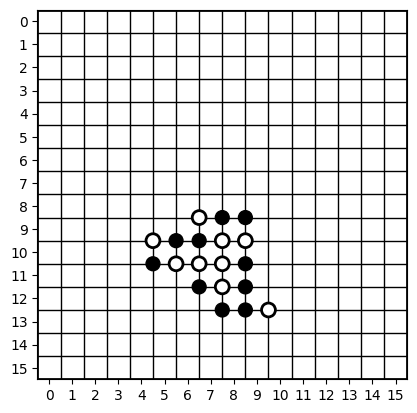

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_dead4_dead3_dead3, move: (((12, 7), (10, 8), (11, 6), (11, 8), (12, 8)), (13, 8)), strength: 8
Analyzing our move...
Using strategy: live2, move: (((9, 4),), (10, 3)), strength: 2


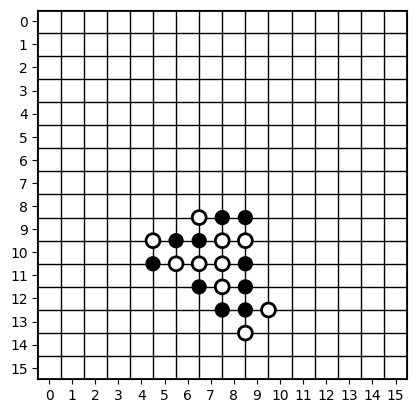

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((12, 9), (13, 8)), (11, 10)), strength: 4
Analyzing our move...
Using strategy: live3, move: (((11, 8), (12, 7)), (13, 6)), strength: 4


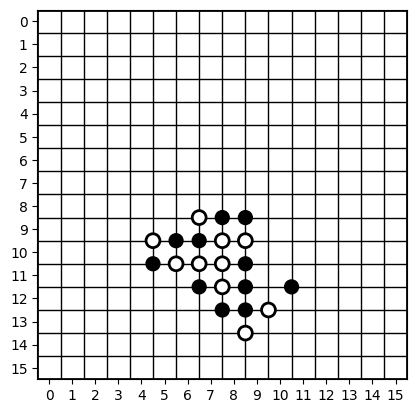

Player2: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((11, 8), (12, 7)), (13, 6)), strength: 4
Analyzing our move...
Using strategy: combo_live2_live2, move: (((13, 8), (12, 9)), (13, 9)), strength: 4


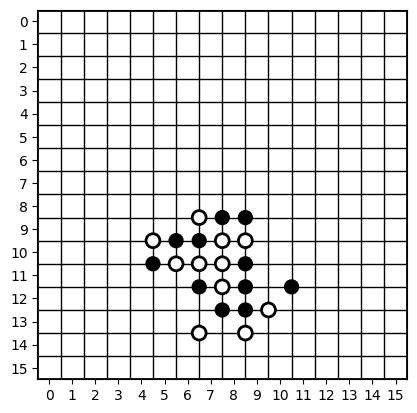

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((13, 6), (13, 8)), (13, 7)), strength: 4
Analyzing our move...
Using strategy: combo_live2_dead3, move: (((11, 10), (11, 8), (12, 8)), (11, 9)), strength: 4


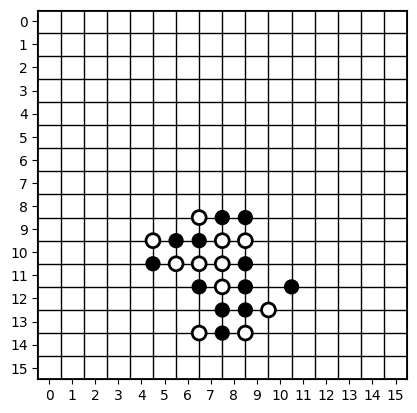

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_dead3, move: (((11, 10), (11, 8), (12, 8), (13, 7)), (11, 9)), strength: 6
Analyzing our move...
Using strategy: dead3, move: (((9, 7), (9, 8)), (9, 9)), strength: 2


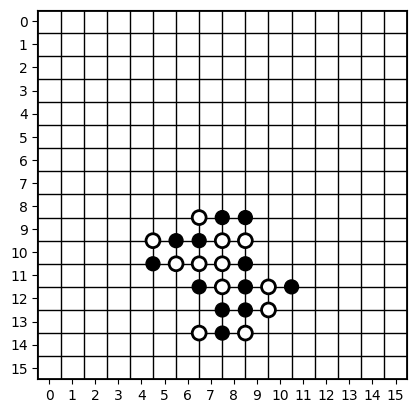

Player1: Making a move...
Analyzing opponent's move...
Using strategy: live3, move: (((11, 9), (12, 9)), (10, 9)), strength: 4
Analyzing our move...
Using strategy: combo_live2_dead3, move: (((12, 7), (12, 8), (13, 7)), (12, 6)), strength: 4


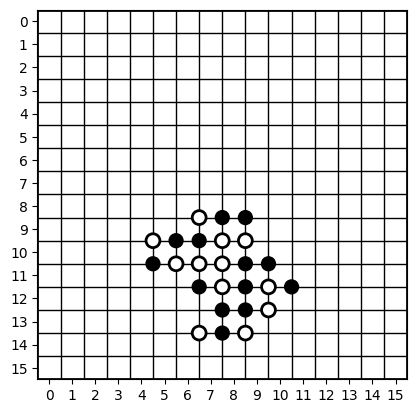

Player2: Making a move...
Analyzing opponent's move...
Using strategy: dead4, move: (((10, 9), (11, 8), (12, 7)), (9, 10)), strength: 4
Analyzing our move...
Using strategy: live2, move: (((9, 4),), (8, 5)), strength: 2


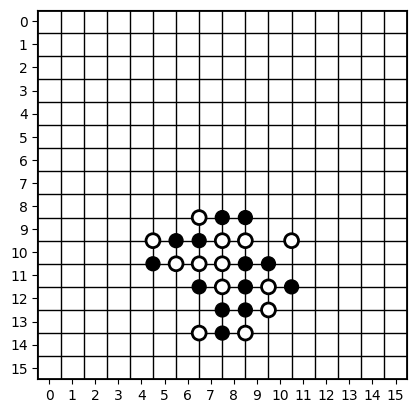

Player1: Making a move...
Analyzing opponent's move...
Using strategy: dead4, move: (((9, 7), (9, 8), (9, 10)), (9, 9)), strength: 4
Analyzing our move...
Using strategy: combo_dead3_live2, move: (((12, 7), (12, 8), (13, 7)), (12, 6)), strength: 4


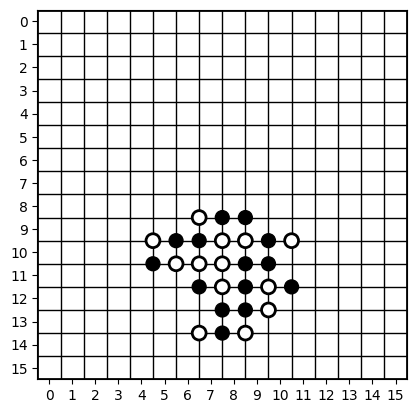

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_dead3, move: (((10, 9), (8, 8), (10, 8), (9, 9)), (10, 10)), strength: 6
Analyzing our move...
Using strategy: combo_live2_dead3, move: (((9, 10), (10, 7), (9, 8)), (8, 9)), strength: 4


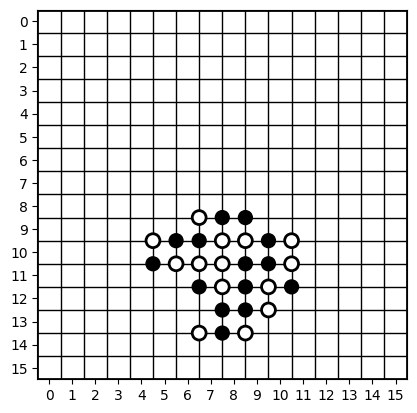

Player1: Making a move...
Analyzing opponent's move...
Using strategy: combo_live2_dead3, move: (((9, 10), (10, 7), (9, 8)), (8, 9)), strength: 4
Analyzing our move...
Using strategy: combo_dead3_dead3, move: (((10, 9), (8, 8), (8, 7), (9, 9)), (8, 9)), strength: 4


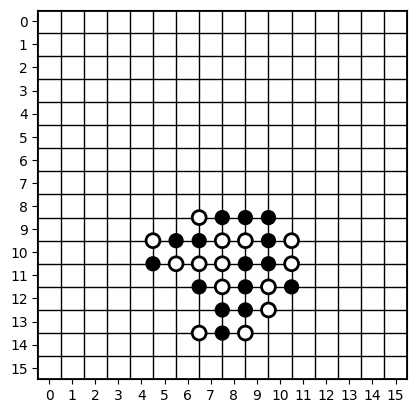

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_dead4_dead3_dead3, move: (((8, 8), (10, 8), (9, 9), (8, 7), (8, 9)), (8, 10)), strength: 8
Analyzing our move...
Using strategy: dead3, move: (((8, 6), (9, 7)), (7, 5)), strength: 2


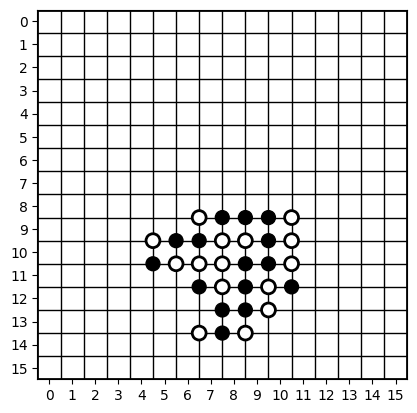

Player1: Making a move...
Analyzing opponent's move...
Using strategy: dead4, move: (((8, 10), (9, 10), (10, 10)), (7, 10)), strength: 4
Analyzing our move...
Using strategy: dead4, move: (((8, 9), (9, 9), (10, 9)), (7, 9)), strength: 4


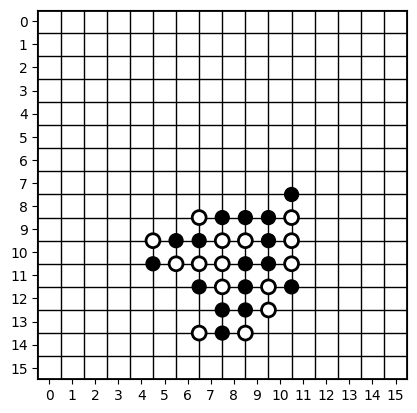

Player2: Making a move...
Analyzing opponent's move...
Using strategy: combo_dead4_dead3_live2, move: (((10, 9), (7, 10), (8, 9), (9, 9)), (7, 9)), strength: 8
Analyzing our move...
Using strategy: combo_dead3_live2, move: (((8, 10), (10, 10), (11, 9)), (9, 11)), strength: 4


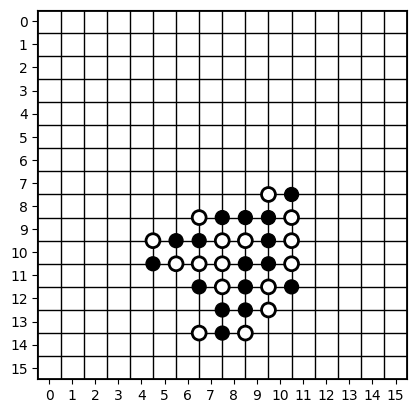

Player1: Making a move...
Analyzing opponent's move...
Using strategy: combo_live3_dead3, move: (((7, 9), (10, 10), (8, 10), (11, 9)), (9, 11)), strength: 6
Analyzing our move...
Using strategy: combo_live2_dead3, move: (((12, 7), (12, 8), (13, 7)), (12, 6)), strength: 4


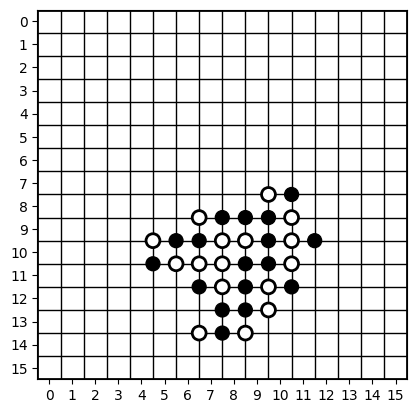

KeyboardInterrupt: 

In [17]:
from typing import Tuple, List
from collections import defaultdict
import random

Coord = Tuple[int, int]
PossibleMove = Tuple[Tuple[Coord], Coord] # (rows of coords, move_coord)
Strategy = Tuple[PossibleMove, int, str] # (move, strength: int, label: str)


class BotPlayer(Player):

    s_DEAD2 = 1
    s_DEAD3 = 2
    s_LIVE2 = 2
    s_DEAD4 = 4
    s_LIVE3 = 4
    s_LIVE4 = 9 # double live3 should not be stronger than single live4
    s_CROSS5 = 20 # double live4 should not be stronger than single cross5

    def __init__(self, player_id=1, board_size=10):
        super().__init__()
        self.player_id = player_id
        self.opponent_id = 2 if player_id == 1 else 1
        self.board_size = board_size

        # optimization
        self.cross6_indices = self.calc_indices(board_size, 6)
        self.cross5_indices = self.calc_indices(board_size, 5)
        self.cross4_indices = self.calc_indices(board_size, 4)

    def on_game_end(self, result: GameResult):
        self.history.append(result.value)

    @staticmethod
    def is_point_on_segment(A, B, P) -> bool:
        x1, y1 = A
        x2, y2 = B
        x, y = P
        # Step 1: Check collinearity
        area = x1 * (y2 - y) + x2 * (y - y1) + x * (y1 - y2)
        # Step 2: Check bounds
        return area == 0 and min(x1, x2) <= x <= max(x1, x2) and min(y1, y2) <= y <= max(y1, y2)

    @staticmethod
    def calc_indices(board_size: int, segment_size: int) -> List[List[Coord]]:
        """
        A common util function for row, column and diagonal indices checking
        """
        indices = []
        # NB: you can calculate the record size by 2*n**2 + 2*n*board_size
        # where n = board_size - segment_size + 1, however, this leads to poor code quality

        # rows
        for i in range(board_size): # vertical
            for j in range(board_size - segment_size + 1):
                indices.append([(i, j + b) for b in range(segment_size)])

        # columns
        for i in range(board_size - segment_size + 1):
            for j in range(board_size):
                indices.append([(i + a, j) for a in range(segment_size)])

        # diagonals
        for i in range(board_size - segment_size + 1): # i limited by smallest possible segment, denote how far diagonal can shifted
            for j in range(board_size - i - segment_size + 1): # j is the complement of i, denote how far the diagonal can go
                index1 = []
                index2 = []
                index3 = []
                index4 = []
                for k in range(segment_size): # k manages nodes in a line
                    xv = j + k # shift vertically
                    index1.append((i + j + k, xv)) # top-left to bottom-right
                    index2.append((i + j + k, board_size - xv - 1)) # bottom-left to top right
                    xh = i + j + k # shift horizontally
                    index3.append((j + k, xh))
                    index4.append((j + k, board_size - xh - 1))
                indices.append(index1)
                indices.append(index2)
                indices.append(index3)
                indices.append(index4)
                    
        return indices

    def construct_sequence(self, board: np.ndarray, sequence: List[Coord], player_id: int, idx_from=None, idx_to=None) -> Optional[PossibleMove]:
        if idx_from is None:
            idx_from = 0
        if idx_to is None:
            idx_to = len(sequence)
        
        rows = []
        move = None
        for i in range(idx_from, idx_to):
            if board[sequence[i]] == 0 and move is None:
                move = sequence[i]
            elif board[sequence[i]] == player_id:
                rows.append(sequence[i])
            else:
                return None
        
        if move is None:
            return None
        return (tuple(rows), move)
    
    def construct_cross5(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        The cross 5 is defined as 5 stones in a row, column or diagonal.
        Player X can easily win by placing stone on existing cross 4.
        like: OXXXX or XXXXO -> OXXXXX or XXXXXO
        Another case is when the 4 stones are waiting for 1 more stone to form a 5-cross.
        like: XXX_X -> XXXXX
        """
        strategies = list[Strategy]()
        
        for index in self.cross5_indices:
            move = self.construct_sequence(board, index, player_id)
            if move is not None:
                strategy = (move, BotPlayer.s_CROSS5, "cross5")
                strategies.append(strategy)

        return strategies
    
    def construct_live4(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        The live 4 is defined as 4 stones in a row, column or diagonal with 1 empty spot.
        Player X can easily win by placing stone on existing live 3.
        like: _XXX__ or __XXX_ or _X_XX_ -> _XXXX_
        Please note that there should be enough space on both sides of constructed live 4.
        """
        strategies = list[Strategy]()
        
        for index in self.cross6_indices:
            if board[index[0]] != 0 or board[index[5]] != 0:
                continue

            next_move = self.construct_sequence(board, index, player_id, 1, 5)
            if next_move is not None:
                strategy = (next_move, BotPlayer.s_LIVE4, "live4")
                strategies.append(strategy)

        return strategies

    def construct_winning_strategies(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        cross5_strategies = self.construct_cross5(board, player_id)
        live4_strategies = self.construct_live4(board, player_id)
        return cross5_strategies + live4_strategies

    def construct_dead4_and_live3(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        The dead 4 is defined as 4 stones in a row, column or diagonal with 1 empty spot.
        Player X can gain advantage by placing stone on existing dead 3.
        like: OXXX_ or OXX_X -> OXXXX
        """
        strategies = set[Strategy]()
        
        # single dead4 or live3 construction
        for index in self.cross5_indices:
            if board[index[0]] == 0 and board[index[4]] == 0:
                # check whether we can construct strong live3
                live3_move = self.construct_sequence(board, index, player_id, 1, 4)
                if live3_move is not None:
                    strategy = (live3_move, BotPlayer.s_LIVE3, "live3")
                    strategies.add(strategy)

                # TODO check weak live3: _X_XX_ or _XX_X_
            
            elif board[index[0]] == 0:
                # check whether we can construct dead4
                next_move = self.construct_sequence(board, index, player_id, 1, 5)
                if next_move is not None:
                    strategy = (next_move, BotPlayer.s_DEAD4, "dead4")
                    strategies.add(strategy)

            elif board[index[4]] == 0:
                # check whether we can construct dead4
                next_move = self.construct_sequence(board, index, player_id, 0, 4)
                if next_move is not None:
                    strategy = (next_move, BotPlayer.s_DEAD4, "dead4")
                    strategies.add(strategy)

        strategies = list(strategies)
        random.shuffle(strategies)

        return strategies

    def construct_dead3_and_live2(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        The dead 3 is defined as 3 stones in a row, column or diagonal with 1 empty spot.
        Player X can gain advantage by placing stone on existing dead 2.
        like: OXX_ or OX_X -> OXXX
        """
        strategies = set[Strategy]()
        
        for index in self.cross4_indices:
            if board[index[0]] == 0 and board[index[3]] == 0:
                # construct live2
                next_move = self.construct_sequence(board, index, player_id, 1, 3)
                if next_move is not None:
                    strategy = (next_move, BotPlayer.s_LIVE2, "live2")
                    strategies.add(strategy)
            
            elif board[index[0]] == 0:
                # construct right side dead3
                next_move = self.construct_sequence(board, index, player_id, 1, 4)
                if next_move is not None:
                    strategy = (next_move, BotPlayer.s_DEAD3, "dead3")
                    strategies.add(strategy)

            elif board[index[3]] == 0:
                # construct left side dead3
                next_move = self.construct_sequence(board, index, player_id, 0, 3)
                if next_move is not None:
                    strategy = (next_move, BotPlayer.s_DEAD3, "dead3")
                    strategies.add(strategy)

        strategies = list(strategies)
        random.shuffle(strategies)

        return strategies

    def construct_advantage_strategies(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        Optimize combo moves
        """

        dead4_and_live3_strategies = self.construct_dead4_and_live3(board, player_id)
        dead3_and_live2_strategies = self.construct_dead3_and_live2(board, player_id)

        comnbos = defaultdict[Coord, List[Strategy]](list)
        for strategy in dead4_and_live3_strategies:
            row = strategy[0][0]
            strategy_lst = comnbos[strategy[0][1]]
            # TODO replace equal with subset operation if row > s[0][0], replace s[0][0] with row.
            if not any([row == s[0][0] for s in strategy_lst]):
                strategy_lst.append(strategy)

        for strategy in dead3_and_live2_strategies:
            row = strategy[0][0]
            strategy_lst = comnbos[strategy[0][1]]
            if not any([row == s[0][0] for s in strategy_lst]):
                strategy_lst.append(strategy)

        final_strategies = []
        for coord, strategies in comnbos.items():
            if len(strategies) == 1:
                final_strategies.append(strategies[0]) 
            else:
                joint_label = "combo"
                joint_rows = set[Coord]()
                joint_strength = 0

                # first pass: calculate aggregate strength
                for move, strength, label in strategies:
                    joint_label += f"_{label}"
                    joint_strength += strength
                    for rc in move[0]:
                        joint_rows.add(rc)
                
                # second pass: scan individual local optimization
                final_s = ((tuple(joint_rows), coord), joint_strength, joint_label)
                jointrl = len(joint_rows)
                for local_s in strategies:
                    if len(local_s[0][0]) == jointrl:
                        final_s = local_s
                        break
                
                final_strategies.append(final_s)

        sorted_final_strategies = sorted(final_strategies, key=lambda x: x[1], reverse=True)

        return sorted_final_strategies

    def construct_default_strategies(self, board: np.ndarray, player_id: int) -> List[Strategy]:
        """
        Check all available position near our stones (dead2)
        """
        possible_moves = set[PossibleMove]()

        for i in range(1, self.board_size - 1): # vertical
            for j in range(1, self.board_size - 1): # horizontal
                point = (i, j)
                # check whether the currrent position has our stone
                if board[point] != player_id:
                    continue
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        if board[i + x, j + y] == 0:
                            next_move = ((point,), (i + x, j + y))
                            possible_moves.add(next_move)

        strategies = list[Strategy]()
        for move in possible_moves:
            strategies.append((move, 1, "dead2"))

        return strategies

    def default_random_move(self, board: np.ndarray) -> np.ndarray:
        # Find all empty spots on the board
        empty_spots = np.argwhere(board == 0)

        # Make it more likely to generate at center by calculating weights based on distance from the center
        center = np.array(board.shape) // 2
        weights = np.exp(-np.linalg.norm(empty_spots - center, axis=1))
        weights /= weights.sum()  # Normalize to make a valid probability distribution

        # Choose an empty spot based on the calculated weights
        return empty_spots[np.random.choice(len(empty_spots), p=weights)]

    def simulate_step(self, board: np.ndarray, player_id: int) -> Tuple[np.ndarray, int]:
        """
        Simulate a single step for the bot player.
        Returns the move and strength of the move.
        """

        # we have a list of strategies ranked from start to end
        strategies = [
            self.construct_winning_strategies,
            self.construct_advantage_strategies,
            self.construct_default_strategies
        ]
        
        for strategy in strategies:
            possible_moves = strategy(board, player_id)
            if len(possible_moves) > 0:
                first_move = possible_moves[0]
                move, strength, label = first_move
                print(f"Using strategy: {label}, move: {move}, strength: {strength}")
                return np.array(move[1]), strength
        
        # if no strategy is applicable, we will randomly place a stone
        return self.default_random_move(board), 0

    def place_stone(self, board: np.ndarray) -> np.ndarray:
        # compare opponent's move with our move and make a decision
        # here we just simulate a single step

        print(f"Player{self.player_id}: Making a move...")
        print(f"Analyzing opponent's move...")
        opponent_move, opponent_strength = self.simulate_step(board, self.opponent_id)
        print(f"Analyzing our move...")
        our_move, our_strength = self.simulate_step(board, self.player_id)

        # if we are at advantage, we will place our stone
        if our_strength > opponent_strength:
            return our_move
        
        # if we are at disadvantage, we will block the opponent to defend
        return opponent_move


class TestBotPlayer:
    def __init__(self):
        self.GAME_SIZE = 10
        self.test_player1 = BotPlayer(player_id=1, board_size=self.GAME_SIZE)
        self.test_player2 = BotPlayer(player_id=2, board_size=self.GAME_SIZE)
        self.game = Game(self.test_player1, self.test_player2, self.GAME_SIZE)

    def test_first_random_move(self):
        self.game.reset()
        stepper = self.game.simulate_moves()
        next(stepper)
        next(stepper)

    def test_construct_cross5(self):
        self.game.reset()
        self.game.board[4, 3:7] = 1
        stepper = self.game.simulate_moves()
        next(stepper)
        self.game.reset()
        self.game.board[4, 3:5] = 1
        self.game.board[4, 6:8] = 1
        stepper = self.game.simulate_moves()
        next(stepper)

    def test_construct_live4(self):
        self.game.reset()
        self.game.board[4, 3:6] = 1
        stepper = self.game.simulate_moves()
        next(stepper)
        self.game.reset()
        self.game.board[4, 3:5] = 1
        self.game.board[4, 6] = 1
        stepper = self.game.simulate_moves()
        next(stepper)

    def test_construct_live3_and_dead4(self):
        # test single live3
        self.game.reset()
        self.game.board[4, 3:4] = 1
        self.game.board[4, 5:6] = 1
        stepper = self.game.simulate_moves()
        next(stepper)
        # test single dead4
        self.game.reset()
        self.game.board[4, 3:5] = 1
        self.game.board[4, 6] = 1
        self.game.board[4, 7] = 2
        stepper = self.game.simulate_moves()
        next(stepper)
        # test intersection of live3 and dead4
        self.game.reset()
        self.game.board[4, 3:4] = 1
        self.game.board[4, 5:6] = 1
        self.game.board[1:4, 4] = 1
        self.game.board[0, 4] = 2
        stepper = self.game.simulate_moves()
        next(stepper)
        # test intersection of live3 and live3
        self.game.reset()
        self.game.board[4, 3:4] = 1
        self.game.board[4, 5:6] = 1
        self.game.board[2:4, 4] = 1
        stepper = self.game.simulate_moves()
        next(stepper)

    def test_construct_dead3_and_live2(self):
        # test double live 2 construction
        self.game.reset()
        self.game.board[4, 3:4] = 1
        self.game.board[4, 5:6] = 1
        self.game.board[4, 6] = 2
        stepper = self.game.simulate_moves()
        next(stepper)
        # test single live2
        self.game.reset()
        self.game.board[4, 4] = 1
        stepper = self.game.simulate_moves()
        next(stepper)
        # test single dead3
        self.game.reset()
        self.game.board[4, 3:5] = 1
        self.game.board[4, 2] = 2
        self.game.board[5, 3:5] = 2
        self.game.board[3, 3:5] = 2
        stepper = self.game.simulate_moves()
        next(stepper)

    def test_general(self):
        player1 = BotPlayer(player_id=1, board_size=15)
        player2 = BotPlayer(player_id=2, board_size=15)
        game = Game(player1, player2, 15)

        stepper = game.simulate_moves()

        import time
        
        while True:
            try:
                next(stepper)
                time.sleep(0.5)
            except StopIteration:
                print(f"Game finished. Winner: {game.check_game_result()}")
                break

    def test_with_human(self):
        player2 = BotPlayer(player_id=2, board_size=15)
        player1 = HumanPlayer()
        game = Game(player1, player2, 15)
        game.simulate()


tester = TestBotPlayer()
tester.test_general()